In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
cust_df = pd.read_csv("../../data/santander-customer-satisfaction/train.csv", encoding = "latin-1")
print("dataset shape:", cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df["TARGET"].value_counts())
unsatisfied_cnt = cust_df[cust_df["TARGET"] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print("unsatisfied 비율은 {0:.2f}".format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
cust_df["var3"].replace(-999999, 2, inplace = True)
cust_df.drop("ID", axis = 1, inplace = True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print("피처 데이터 shape:{0}".format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                   test_size = 0.2, random_state = 0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print("학습 세트 Shape: {0}, 테스트 세트 Shape:{1}".format(x_train.shape, x_test.shape))

print("학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)
print("\n 테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/test_cnt)

학습 세트 Shape: (60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(x_train, y_train, early_stopping_rounds=100,
           eval_metric="auc", eval_set = [(x_train, y_train), (x_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,1], 
                              average = "macro")
print("ROC AUC: {0:.4f}".format(xgb_roc_score))

ROC AUC: 0.8413


In [14]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators = 100)

params = {"max_depth":[5,7], "min_child_weight":[1,3],
         "colsample_bytee":[0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid = params, cv = 3)
gridcv.fit(x_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
          eval_set = [(x_train, y_train), (x_test, y_test)])

print("GridSearchCV 최적 파라미터:", gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:, 1],
                             average = "macro")
print("ROC AUC: {0:.4f}".format(xgb_roc_score))

GridSearchCV 최적 파라미터: {'colsample_bytee': 0.5, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC: 0.8419


In [15]:
# n_estimators는 1000으로 증가시키고, learning_rate = 0.02로 감소, reg_alpha = 0.03으로 추가함.
xgb_clf = XGBClassifier(n_estimators = 1000, random_state = 156, learning_rate=0.02,
                       max_depth = 7, min_child_weight=1, colsample_bytree = 0.75,
                       reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(x_train, y_train, early_stopping_rounds = 200,
           eval_metric = "auc", eval_set = [(x_train, y_train), (x_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:, 1], 
                              average = "macro")
print("ROC AUC:{0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.75494	validation_1-auc:0.75869
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.81631	validation_1-auc:0.81861
[2]	validation_0-auc:0.83238	validation_1-auc:0.82547
[3]	validation_0-auc:0.83570	validation_1-auc:0.82720
[4]	validation_0-auc:0.83704	validation_1-auc:0.82693
[5]	validation_0-auc:0.83875	validation_1-auc:0.82952
[6]	validation_0-auc:0.83841	validation_1-auc:0.82939
[7]	validation_0-auc:0.83721	validation_1-auc:0.82850
[8]	validation_0-auc:0.83838	validation_1-auc:0.82907
[9]	validation_0-auc:0.83992	validation_1-auc:0.83026
[10]	validation_0-auc:0.84061	validation_1-auc:0.83057
[11]	validation_0-auc:0.84108	validation_1-auc:0.83074
[12]	validation_0-auc:0.84111	validation_1-auc:0.83051
[13]	validation_0-auc:0.84200	validation_1-auc:0.83016
[14]	validation_0-auc:0.84327	validation_1-auc:0.83179
[15]	validation_0-auc:0.842

[146]	validation_0-auc:0.87923	validation_1-auc:0.84440
[147]	validation_0-auc:0.87953	validation_1-auc:0.84433
[148]	validation_0-auc:0.87980	validation_1-auc:0.84423
[149]	validation_0-auc:0.88003	validation_1-auc:0.84427
[150]	validation_0-auc:0.88009	validation_1-auc:0.84423
[151]	validation_0-auc:0.88025	validation_1-auc:0.84439
[152]	validation_0-auc:0.88057	validation_1-auc:0.84440
[153]	validation_0-auc:0.88088	validation_1-auc:0.84454
[154]	validation_0-auc:0.88103	validation_1-auc:0.84465
[155]	validation_0-auc:0.88127	validation_1-auc:0.84468
[156]	validation_0-auc:0.88156	validation_1-auc:0.84487
[157]	validation_0-auc:0.88166	validation_1-auc:0.84482
[158]	validation_0-auc:0.88193	validation_1-auc:0.84486
[159]	validation_0-auc:0.88212	validation_1-auc:0.84496
[160]	validation_0-auc:0.88223	validation_1-auc:0.84475
[161]	validation_0-auc:0.88248	validation_1-auc:0.84500
[162]	validation_0-auc:0.88251	validation_1-auc:0.84501
[163]	validation_0-auc:0.88277	validation_1-auc:

[293]	validation_0-auc:0.90396	validation_1-auc:0.84472
[294]	validation_0-auc:0.90402	validation_1-auc:0.84473
[295]	validation_0-auc:0.90410	validation_1-auc:0.84473
[296]	validation_0-auc:0.90416	validation_1-auc:0.84467
[297]	validation_0-auc:0.90424	validation_1-auc:0.84468
[298]	validation_0-auc:0.90429	validation_1-auc:0.84465
[299]	validation_0-auc:0.90441	validation_1-auc:0.84461
[300]	validation_0-auc:0.90448	validation_1-auc:0.84457
[301]	validation_0-auc:0.90450	validation_1-auc:0.84458
[302]	validation_0-auc:0.90459	validation_1-auc:0.84459
[303]	validation_0-auc:0.90463	validation_1-auc:0.84457
[304]	validation_0-auc:0.90472	validation_1-auc:0.84445
[305]	validation_0-auc:0.90487	validation_1-auc:0.84440
[306]	validation_0-auc:0.90491	validation_1-auc:0.84444
[307]	validation_0-auc:0.90497	validation_1-auc:0.84441
[308]	validation_0-auc:0.90517	validation_1-auc:0.84443
[309]	validation_0-auc:0.90520	validation_1-auc:0.84439
[310]	validation_0-auc:0.90524	validation_1-auc:

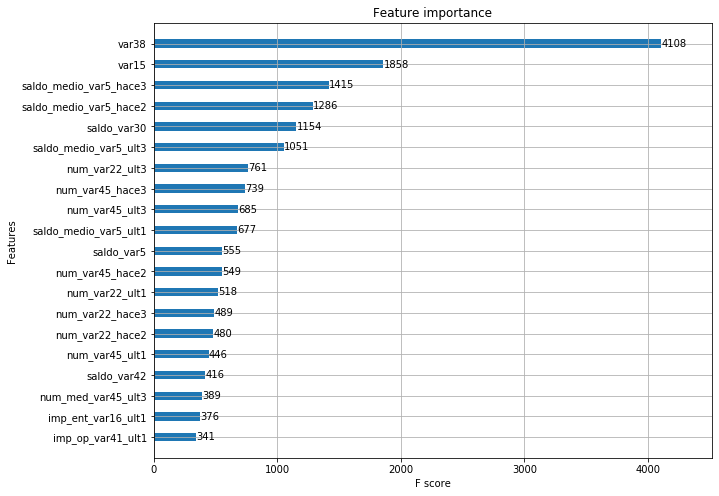

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(x_test, y_test)]
lgbm_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="auc",
            eval_set = evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:,1], 
                              average = "macro")
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [20]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {"num_leaves":[32, 64],
         "max_depth":[128, 160],
         "min_child_samples":[60, 100],
         "subsample":[0.8, 1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv = 3)
gridcv.fit(x_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
          eval_set = [(x_train, y_train), (x_test, y_test)])

print("GridSearchCV 최적 파라미터:", gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:, 1],
                              average = "macro")
print("ROC AUC:{0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	val

[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.880036	valid_0's binary_logloss: 0.121998	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139306
[39]	valid_0's auc: 0.880641	valid_0's binary_logloss: 0.121716	valid_1's auc: 0.838787	valid_1's binary_logloss: 0.139269
[40]	valid_0's auc: 0.881249	valid_0's binary_logloss: 0.121482	valid_1's auc: 0.838906	valid_1's binary_logloss: 0.139223
[41]	valid_0's auc: 0.881919	valid_0's binary_logloss: 0.121223	valid_1's auc: 0.838567	valid_1's binary_logloss: 0.13926
Early stopping, best iteration is:
[11]	valid_0's auc: 0.855647	valid_0's binary_logloss: 0.133227	valid_1's auc: 0.840035	valid_1's binary_logloss: 0.143552
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827488	valid_0's binary_l

[16]	valid_0's auc: 0.860191	valid_0's binary_logloss: 0.129596	valid_1's auc: 0.836016	valid_1's binary_logloss: 0.141822
[17]	valid_0's auc: 0.860941	valid_0's binary_logloss: 0.129064	valid_1's auc: 0.836076	valid_1's binary_logloss: 0.141551
[18]	valid_0's auc: 0.862201	valid_0's binary_logloss: 0.128565	valid_1's auc: 0.835929	valid_1's binary_logloss: 0.141326
[19]	valid_0's auc: 0.863581	valid_0's binary_logloss: 0.128105	valid_1's auc: 0.835256	valid_1's binary_logloss: 0.141243
[20]	valid_0's auc: 0.864799	valid_0's binary_logloss: 0.127654	valid_1's auc: 0.83435	valid_1's binary_logloss: 0.141148
[21]	valid_0's auc: 0.866472	valid_0's binary_logloss: 0.127165	valid_1's auc: 0.834176	valid_1's binary_logloss: 0.141041
[22]	valid_0's auc: 0.867055	valid_0's binary_logloss: 0.126777	valid_1's auc: 0.834173	valid_1's binary_logloss: 0.140887
[23]	valid_0's auc: 0.867726	valid_0's binary_logloss: 0.12643	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.140909
[24]	valid_0's auc

[14]	valid_0's auc: 0.858827	valid_0's binary_logloss: 0.131006	valid_1's auc: 0.838498	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.860574	valid_0's binary_logloss: 0.130352	valid_1's auc: 0.837435	valid_1's binary_logloss: 0.141868
[16]	valid_0's auc: 0.861239	valid_0's binary_logloss: 0.129765	valid_1's auc: 0.837374	valid_1's binary_logloss: 0.141537
[17]	valid_0's auc: 0.86217	valid_0's binary_logloss: 0.129164	valid_1's auc: 0.837703	valid_1's binary_logloss: 0.141192
[18]	valid_0's auc: 0.863228	valid_0's binary_logloss: 0.128615	valid_1's auc: 0.837526	valid_1's binary_logloss: 0.140917
[19]	valid_0's auc: 0.86473	valid_0's binary_logloss: 0.128113	valid_1's auc: 0.838235	valid_1's binary_logloss: 0.140572
[20]	valid_0's auc: 0.865797	valid_0's binary_logloss: 0.127679	valid_1's auc: 0.838788	valid_1's binary_logloss: 0.140332
[21]	valid_0's auc: 0.866561	valid_0's binary_logloss: 0.127235	valid_1's auc: 0.839171	valid_1's binary_logloss: 0.140108
[22]	valid_0's auc

[24]	valid_0's auc: 0.883011	valid_0's binary_logloss: 0.121078	valid_1's auc: 0.829054	valid_1's binary_logloss: 0.14178
[25]	valid_0's auc: 0.884627	valid_0's binary_logloss: 0.120587	valid_1's auc: 0.82942	valid_1's binary_logloss: 0.141653
[26]	valid_0's auc: 0.885304	valid_0's binary_logloss: 0.120169	valid_1's auc: 0.828716	valid_1's binary_logloss: 0.141755
[27]	valid_0's auc: 0.88664	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.828869	valid_1's binary_logloss: 0.141682
[28]	valid_0's auc: 0.887143	valid_0's binary_logloss: 0.119308	valid_1's auc: 0.828987	valid_1's binary_logloss: 0.141649
[29]	valid_0's auc: 0.88825	valid_0's binary_logloss: 0.1189	valid_1's auc: 0.829075	valid_1's binary_logloss: 0.141601
[30]	valid_0's auc: 0.889081	valid_0's binary_logloss: 0.118531	valid_1's auc: 0.828871	valid_1's binary_logloss: 0.141605
[31]	valid_0's auc: 0.890195	valid_0's binary_logloss: 0.118117	valid_1's auc: 0.828972	valid_1's binary_logloss: 0.141605
[32]	valid_0's auc: 0.

[11]	valid_0's auc: 0.866805	valid_0's binary_logloss: 0.130172	valid_1's auc: 0.835375	valid_1's binary_logloss: 0.143933
[12]	valid_0's auc: 0.868266	valid_0's binary_logloss: 0.129101	valid_1's auc: 0.835951	valid_1's binary_logloss: 0.143342
[13]	valid_0's auc: 0.870762	valid_0's binary_logloss: 0.128144	valid_1's auc: 0.83626	valid_1's binary_logloss: 0.142813
[14]	valid_0's auc: 0.872747	valid_0's binary_logloss: 0.127222	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.142466
[15]	valid_0's auc: 0.874158	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.83548	valid_1's binary_logloss: 0.142108
[16]	valid_0's auc: 0.875931	valid_0's binary_logloss: 0.125651	valid_1's auc: 0.836367	valid_1's binary_logloss: 0.141684
[17]	valid_0's auc: 0.876854	valid_0's binary_logloss: 0.124918	valid_1's auc: 0.835689	valid_1's binary_logloss: 0.141524
[18]	valid_0's auc: 0.878211	valid_0's binary_logloss: 0.124197	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.141285
[19]	valid_0's auc

[30]	valid_0's auc: 0.889081	valid_0's binary_logloss: 0.118531	valid_1's auc: 0.828871	valid_1's binary_logloss: 0.141605
[31]	valid_0's auc: 0.890195	valid_0's binary_logloss: 0.118117	valid_1's auc: 0.828972	valid_1's binary_logloss: 0.141605
[32]	valid_0's auc: 0.890928	valid_0's binary_logloss: 0.117735	valid_1's auc: 0.827969	valid_1's binary_logloss: 0.141796
[33]	valid_0's auc: 0.891505	valid_0's binary_logloss: 0.117389	valid_1's auc: 0.827611	valid_1's binary_logloss: 0.141916
[34]	valid_0's auc: 0.892223	valid_0's binary_logloss: 0.11707	valid_1's auc: 0.827019	valid_1's binary_logloss: 0.142051
[35]	valid_0's auc: 0.892825	valid_0's binary_logloss: 0.116751	valid_1's auc: 0.826865	valid_1's binary_logloss: 0.142116
[36]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116353	valid_1's auc: 0.827203	valid_1's binary_logloss: 0.14207
[37]	valid_0's auc: 0.89456	valid_0's binary_logloss: 0.11603	valid_1's auc: 0.827292	valid_1's binary_logloss: 0.142005
[38]	valid_0's auc: 

[23]	valid_0's auc: 0.883635	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.140607
[24]	valid_0's auc: 0.884533	valid_0's binary_logloss: 0.120734	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.14049
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[26]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.119794	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.140423
[27]	valid_0's auc: 0.887064	valid_0's binary_logloss: 0.119366	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.140447
[28]	valid_0's auc: 0.887621	valid_0's binary_logloss: 0.119008	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140532
[29]	valid_0's auc: 0.888965	valid_0's binary_logloss: 0.118547	valid_1's auc: 0.835464	valid_1's binary_logloss: 0.140508
[30]	valid_0's auc: 0.889898	valid_0's binary_logloss: 0.118139	valid_1's auc: 0.83577	valid_1's binary_logloss: 0.140461
[31]	valid_0's auc

[41]	valid_0's auc: 0.87809	valid_0's binary_logloss: 0.122813	valid_1's auc: 0.834199	valid_1's binary_logloss: 0.140085
Early stopping, best iteration is:
[11]	valid_0's auc: 0.852238	valid_0's binary_logloss: 0.133835	valid_1's auc: 0.837243	valid_1's binary_logloss: 0.143925
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 

[32]	valid_0's auc: 0.87282	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.838675	valid_1's binary_logloss: 0.139761
[33]	valid_0's auc: 0.874106	valid_0's binary_logloss: 0.124412	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.139687
[34]	valid_0's auc: 0.874887	valid_0's binary_logloss: 0.124169	valid_1's auc: 0.838801	valid_1's binary_logloss: 0.139672
[35]	valid_0's auc: 0.875447	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.838835	valid_1's binary_logloss: 0.139667
[36]	valid_0's auc: 0.87617	valid_0's binary_logloss: 0.123693	valid_1's auc: 0.838505	valid_1's binary_logloss: 0.139699
[37]	valid_0's auc: 0.876793	valid_0's binary_logloss: 0.12346	valid_1's auc: 0.838104	valid_1's binary_logloss: 0.139783
[38]	valid_0's auc: 0.877265	valid_0's binary_logloss: 0.123251	valid_1's auc: 0.838267	valid_1's binary_logloss: 0.139787
[39]	valid_0's auc: 0.877869	valid_0's binary_logloss: 0.123018	valid_1's auc: 0.838004	valid_1's binary_logloss: 0.139806
[40]	valid_0's auc:

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	vali

[39]	valid_0's auc: 0.877869	valid_0's binary_logloss: 0.123018	valid_1's auc: 0.838004	valid_1's binary_logloss: 0.139806
[40]	valid_0's auc: 0.878509	valid_0's binary_logloss: 0.122803	valid_1's auc: 0.838086	valid_1's binary_logloss: 0.139745
[41]	valid_0's auc: 0.879077	valid_0's binary_logloss: 0.122585	valid_1's auc: 0.838538	valid_1's binary_logloss: 0.139694
[42]	valid_0's auc: 0.879515	valid_0's binary_logloss: 0.122368	valid_1's auc: 0.838647	valid_1's binary_logloss: 0.139655
[43]	valid_0's auc: 0.879985	valid_0's binary_logloss: 0.122166	valid_1's auc: 0.838495	valid_1's binary_logloss: 0.139653
[44]	valid_0's auc: 0.88041	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.838221	valid_1's binary_logloss: 0.139755
[45]	valid_0's auc: 0.880907	valid_0's binary_logloss: 0.121777	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.139769
[46]	valid_0's auc: 0.881216	valid_0's binary_logloss: 0.121594	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.139693
[47]	valid_0's au

[12]	valid_0's auc: 0.868329	valid_0's binary_logloss: 0.130024	valid_1's auc: 0.837259	valid_1's binary_logloss: 0.14244
[13]	valid_0's auc: 0.869137	valid_0's binary_logloss: 0.129145	valid_1's auc: 0.837689	valid_1's binary_logloss: 0.141896
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 0.874251	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.140582
[18]	valid_0's auc: 0.875622	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.140485
[19]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.124759	valid_1's auc: 0.836188	valid_1's binary_logloss: 0.14029
[20]	valid_0's auc: 0

[37]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117321	valid_1's auc: 0.837291	valid_1's binary_logloss: 0.140221
[38]	valid_0's auc: 0.893318	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.837278	valid_1's binary_logloss: 0.140221
[39]	valid_0's auc: 0.894018	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.83724	valid_1's binary_logloss: 0.140232
[40]	valid_0's auc: 0.894781	valid_0's binary_logloss: 0.116373	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140328
[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc: 0.895842	valid_0's binary_logloss: 0.115755	valid_1's auc: 0.836383	valid_1's binary_logloss: 0.140503
[43]	valid_0's auc: 0.896389	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.836348	valid_1's binary_logloss: 0.140505
[44]	valid_0's auc: 0.896843	valid_0's binary_logloss: 0.115204	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.140518
[45]	valid_0's au

[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 0.874251	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.140582
[18]	valid_0's auc: 0.875622	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.140485
[19]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.124759	valid_1's auc: 0.836188	valid_1's binary_logloss: 0.14029
[20]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124156	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140133
[21]	valid_0's auc: 0.879478	valid_0's binary_logloss: 0.123507	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.13995
[22]	valid_0's auc: 0

[43]	valid_0's auc: 0.896389	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.836348	valid_1's binary_logloss: 0.140505
[44]	valid_0's auc: 0.896843	valid_0's binary_logloss: 0.115204	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.140518
[45]	valid_0's auc: 0.897272	valid_0's binary_logloss: 0.114886	valid_1's auc: 0.836311	valid_1's binary_logloss: 0.140581
[46]	valid_0's auc: 0.898034	valid_0's binary_logloss: 0.114544	valid_1's auc: 0.835871	valid_1's binary_logloss: 0.140663
[47]	valid_0's auc: 0.898562	valid_0's binary_logloss: 0.114262	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.140642
[48]	valid_0's auc: 0.898919	valid_0's binary_logloss: 0.114006	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140687
[49]	valid_0's auc: 0.899111	valid_0's binary_logloss: 0.113791	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140728
[50]	valid_0's auc: 0.89987	valid_0's binary_logloss: 0.113543	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.14075
[51]	valid_0's auc

[14]	valid_0's auc: 0.859243	valid_0's binary_logloss: 0.130936	valid_1's auc: 0.838705	valid_1's binary_logloss: 0.141913
[15]	valid_0's auc: 0.860124	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.838608	valid_1's binary_logloss: 0.141547
[16]	valid_0's auc: 0.861358	valid_0's binary_logloss: 0.129687	valid_1's auc: 0.838422	valid_1's binary_logloss: 0.141134
[17]	valid_0's auc: 0.862159	valid_0's binary_logloss: 0.129139	valid_1's auc: 0.838636	valid_1's binary_logloss: 0.140786
[18]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.128664	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.140538
[19]	valid_0's auc: 0.863842	valid_0's binary_logloss: 0.128137	valid_1's auc: 0.838464	valid_1's binary_logloss: 0.140331
[20]	valid_0's auc: 0.864859	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.837832	valid_1's binary_logloss: 0.140179
[21]	valid_0's auc: 0.866227	valid_0's binary_logloss: 0.127137	valid_1's auc: 0.837735	valid_1's binary_logloss: 0.140043
[22]	valid_0's a

[50]	valid_0's auc: 0.886433	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.139332
[51]	valid_0's auc: 0.886975	valid_0's binary_logloss: 0.119377	valid_1's auc: 0.838335	valid_1's binary_logloss: 0.139331
[52]	valid_0's auc: 0.887568	valid_0's binary_logloss: 0.119161	valid_1's auc: 0.838204	valid_1's binary_logloss: 0.139331
[53]	valid_0's auc: 0.887867	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.838044	valid_1's binary_logloss: 0.13936
[54]	valid_0's auc: 0.888093	valid_0's binary_logloss: 0.118834	valid_1's auc: 0.838137	valid_1's binary_logloss: 0.13935
[55]	valid_0's auc: 0.888289	valid_0's binary_logloss: 0.118675	valid_1's auc: 0.837878	valid_1's binary_logloss: 0.139392
[56]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118561	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.139418
[57]	valid_0's auc: 0.889157	valid_0's binary_logloss: 0.118369	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139447
[58]	valid_0's auc

[25]	valid_0's auc: 0.869304	valid_0's binary_logloss: 0.125622	valid_1's auc: 0.838562	valid_1's binary_logloss: 0.139648
[26]	valid_0's auc: 0.870347	valid_0's binary_logloss: 0.125288	valid_1's auc: 0.838228	valid_1's binary_logloss: 0.139618
[27]	valid_0's auc: 0.871198	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139594
[28]	valid_0's auc: 0.872024	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.838405	valid_1's binary_logloss: 0.139526
[29]	valid_0's auc: 0.873184	valid_0's binary_logloss: 0.124303	valid_1's auc: 0.838211	valid_1's binary_logloss: 0.139531
[30]	valid_0's auc: 0.874076	valid_0's binary_logloss: 0.12403	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139411
[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's au

[54]	valid_0's auc: 0.888093	valid_0's binary_logloss: 0.118834	valid_1's auc: 0.838137	valid_1's binary_logloss: 0.13935
[55]	valid_0's auc: 0.888289	valid_0's binary_logloss: 0.118675	valid_1's auc: 0.837878	valid_1's binary_logloss: 0.139392
[56]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118561	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.139418
[57]	valid_0's auc: 0.889157	valid_0's binary_logloss: 0.118369	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139447
[58]	valid_0's auc: 0.889659	valid_0's binary_logloss: 0.11819	valid_1's auc: 0.837789	valid_1's binary_logloss: 0.139431
Early stopping, best iteration is:
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84519	valid_0's binary_logl

[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.891402	valid_0's binary_logloss: 0.118166	valid_1's auc: 0.836264	valid_1's binary_logloss: 0.139884
[30]	valid_0's auc: 0.891982	valid_0's binary_logloss: 0.117805	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.139937
[31]	valid_0's auc

[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
Early stopping, best iteration is:
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logl

[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.891402	valid_0's binary_logloss: 0.118166	valid_1's auc: 0.836264	valid_1's binary_logloss: 0.139884
[30]	valid_0's auc

[49]	valid_0's auc: 0.902922	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.140819
[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
Early stopping, best iteration is:
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_lo

[23]	valid_0's auc: 0.865866	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139625
[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0

[58]	valid_0's auc: 0.885606	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139938
[59]	valid_0's auc: 0.885965	valid_0's binary_logloss: 0.119403	valid_1's auc: 0.837558	valid_1's binary_logloss: 0.140007
[60]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.140079
[61]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.119118	valid_1's auc: 0.837349	valid_1's binary_logloss: 0.140059
Early stopping, best iteration is:
[31]	valid_0's auc: 0.87247	valid_0's binary_logloss: 0.124907	valid_1's auc: 0.838959	valid_1's binary_logloss: 0.139727
[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_log

[23]	valid_0's auc: 0.865866	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139625
[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0

[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.139926
[57]	valid_0's auc: 0.885365	valid_0's binary_logloss: 0.11975	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139934
[58]	valid_0's auc: 0.885606	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139938
[59]	valid_0's auc: 0.885965	valid_0's binary_logloss: 0.119403	valid_1's auc: 0.837558	valid_1's binary_logloss: 0.140007
[60]	valid_0's auc: 

[20]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124156	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140133
[21]	valid_0's auc: 0.879478	valid_0's binary_logloss: 0.123507	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.13995
[22]	valid_0's auc: 0.880423	valid_0's binary_logloss: 0.123029	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.139912
[23]	valid_0's auc: 0.881684	valid_0's binary_logloss: 0.122492	valid_1's auc: 0.836983	valid_1's binary_logloss: 0.139762
[24]	valid_0's auc: 0.882873	valid_0's binary_logloss: 0.121986	valid_1's auc: 0.837319	valid_1's binary_logloss: 0.139659
[25]	valid_0's auc: 0.883597	valid_0's binary_logloss: 0.121566	valid_1's auc: 0.837154	valid_1's binary_logloss: 0.139623
[26]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.121104	valid_1's auc: 0.836302	valid_1's binary_logloss: 0.139668
[27]	valid_0's auc: 0.886026	valid_0's binary_logloss: 0.120635	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.139601
[28]	valid_0's au

[44]	valid_0's auc: 0.896843	valid_0's binary_logloss: 0.115204	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.140518
[45]	valid_0's auc: 0.897272	valid_0's binary_logloss: 0.114886	valid_1's auc: 0.836311	valid_1's binary_logloss: 0.140581
[46]	valid_0's auc: 0.898034	valid_0's binary_logloss: 0.114544	valid_1's auc: 0.835871	valid_1's binary_logloss: 0.140663
[47]	valid_0's auc: 0.898562	valid_0's binary_logloss: 0.114262	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.140642
[48]	valid_0's auc: 0.898919	valid_0's binary_logloss: 0.114006	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140687
[49]	valid_0's auc: 0.899111	valid_0's binary_logloss: 0.113791	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140728
[50]	valid_0's auc: 0.89987	valid_0's binary_logloss: 0.113543	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.14075
[51]	valid_0's auc: 0.90004	valid_0's binary_logloss: 0.113342	valid_1's auc: 0.835947	valid_1's binary_logloss: 0.140748
[52]	valid_0's auc:

[13]	valid_0's auc: 0.869137	valid_0's binary_logloss: 0.129145	valid_1's auc: 0.837689	valid_1's binary_logloss: 0.141896
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 0.874251	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.140582
[18]	valid_0's auc: 0.875622	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.140485
[19]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.124759	valid_1's auc: 0.836188	valid_1's binary_logloss: 0.14029
[20]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124156	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140133
[21]	valid_0's auc: 

[38]	valid_0's auc: 0.893318	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.837278	valid_1's binary_logloss: 0.140221
[39]	valid_0's auc: 0.894018	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.83724	valid_1's binary_logloss: 0.140232
[40]	valid_0's auc: 0.894781	valid_0's binary_logloss: 0.116373	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140328
[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc: 0.895842	valid_0's binary_logloss: 0.115755	valid_1's auc: 0.836383	valid_1's binary_logloss: 0.140503
[43]	valid_0's auc: 0.896389	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.836348	valid_1's binary_logloss: 0.140505
[44]	valid_0's auc: 0.896843	valid_0's binary_logloss: 0.115204	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.140518
[45]	valid_0's auc: 0.897272	valid_0's binary_logloss: 0.114886	valid_1's auc: 0.836311	valid_1's binary_logloss: 0.140581
[46]	valid_0's au

In [21]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 32, sumbsample = 0.8,
                         min_child_samples = 100, max_depth = 128)

evals = [(x_test, y_test)]
lgbm_clf.fit(x_train, y_train, early_stopping_rounds = 100, eval_metric="auc",
            eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:, 1],
                              average = "macro")
print("ROC AUC:{0:.4f}".format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	v